In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
macro=pd.read_excel('macro_economic.xlsx')
weather=pd.read_excel('concat weather.xlsx')
data=pd.read_excel('events_holidays_modified.xlsx')

# Data preparation for event_holiday dataset.

In [3]:
#There was some chnages donw on the event holiday data as there was various events were there in a month so summed up all the 
#events and Federal Holiday and made id as the columns.because the number of events and federal holidays increase then there is 
#increase in sale but the main problem for doing this is that we will give same importance to all the events.

In [4]:
data['Year']=pd.DatetimeIndex(data['Date-Month-Year']).year
data['Month']=pd.DatetimeIndex(data['Date-Month-Year']).month
data.drop(columns='Date-Month-Year',inplace=True)
data.head()

,Event,DayCategory,Year,Month
0,New Year's Day,Federal Holiday,2009,1
1,Martin Luther King Jr. Day,Federal Holiday,2009,1
2,Valentine's Day,Event,2009,2
3,Presidents' Day,Federal Holiday,2009,2
4,Easter Sunday,Event,2009,4


In [5]:
data=data.groupby(by=('Year','Month','DayCategory')).count()
data.reset_index(inplace=True)
data.head()

,Year,Month,DayCategory,Event
0,2009,1,Federal Holiday,2
1,2009,2,Event,1
2,2009,2,Federal Holiday,1
3,2009,4,Event,1
4,2009,5,Event,1


In [6]:
# Now we have data which is groupedby Year,Month,DayCategory but we want Federal Holiday and Events as a columns so remaining 
# work was done on exel and new data set was loaded and remaining work was done on it.

In [7]:
data_org=pd.read_csv('event_h.csv')

In [8]:
event=data_org.groupby(by=('Year','Month')).sum()
event.reset_index(inplace=True)
event.head()

,Year,Month,Federal Holiday,Events
0,2009,1,2,0
1,2009,2,1,1
2,2009,4,0,1
3,2009,5,1,1
4,2009,6,0,1


In [9]:
# now from hear we will get how many Federal Holiday and Events are there for each month.

# Data preparation for macro dataset.

In [10]:
macro.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009 - Apr,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009 - May,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,?,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


In [11]:
macro.shape

(96, 18)

In [12]:
#now out of 96 rows 85 rows have ? and PartyInPower as there is one catagory so information gain from the columns is very less 
#so droping th columns.

In [13]:
macro.drop(columns=['AdvertisingExpenses (in Thousand Dollars)','PartyInPower'],inplace=True)

In [14]:
month=[]
year=[]
for i in range(len(macro['Year-Month'])):
    c=macro['Year-Month'][i].split('-')
    month.append(c[1])
    year.append(c[0])
macro['Month']=month
macro['Year']=year
macro.drop(columns='Year-Month',inplace=True)

In [15]:
macro['Month'].replace({' Jan':1,' Feb':2,' Mar':3,' Apr':4,' May':5,' Jun':6,' Jul':7,' Aug':8,' Sep':9,' Oct':10,' Nov':11,' Dec':12},inplace=True)

In [16]:
macro['Year']=macro['Year'].astype('int64')

# Data preparation for weather_dataset.

In [17]:
weather.head()

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,-3,-6,-9,-16,-17,-19,54,...,1023,1015,16,16,16,37,18,60,0,NaN
1,2009,Jan,2,1,-2,-5,-3,-7,-17,78,...,1012,1007,16,13,2,27,10,48,T,Snow
2,2009,Jan,3,3,1,-2,-5,-9,-13,72,...,1015,1008,16,16,16,27,16,42,T,NaN
3,2009,Jan,4,6,1,-4,-10,-12,-13,55,...,1017,1015,16,16,16,32,12,40,0,NaN
4,2009,Jan,5,6,5,3,-1,-5,-16,62,...,1014,1013,16,16,16,23,11,34,T,NaN


In [18]:
#After importing we have some problem with the columns name of the data as some columns we in format ex:-'Humidity\xa0(%) avg'
##so converting the column names to its correct name.

In [19]:
#example:-
weather.columns[10]

'Humidity\xa0(%) avg'

In [20]:
col=[]
for i in list(weather.columns):
    col.append(i.replace('\xa0',''))
weather.columns=col

In [21]:
weather['Month'].replace({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12},inplace=True)

In [22]:
weather=weather[(weather['Temp high (°C)']!='-') & (weather['Temp high (°C)']!='high')]
weather=weather[weather['Sea Level Press.(hPa) high']!='-']
weather=weather[weather['Visibility(km) high']!='-']
weather=weather[weather['Wind(km/h) low']!='-']
weather=weather[weather['Wind(km/h) high']!='-']

In [23]:
weather.drop(columns=['Precip.(mm) sum','WeatherEvent','Day'],inplace=True)

In [24]:
columns=weather.select_dtypes(object).columns
for i in columns:
    weather[i]= weather[i].astype('float64')

In [25]:
weather=weather.groupby(by=['Year','Month']).agg('mean')

In [26]:
weather.reset_index(inplace=True)

In [27]:
#There we so many null values and some unknown values in Precip.(mm) sum,WeatherEvent like 'T' in Precip.(mm) sum column so 
##droping it. note:---"Can predict WeatherEvent Logistic regression but it the predicted values will be highly dependent on 
##other varibles so not using it."

# Data preparation for train_dataset and imputation.

In [28]:
train.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [29]:
train.isnull().sum()

Year                          0
Month                         0
ProductCategory               0
Sales(In ThousandDollars)    12
dtype: int64

In [30]:
g=train.groupby(by=['Year','ProductCategory'])
a=train['Year'].unique()
b=train['ProductCategory'].unique()
table=pd.pivot_table(data=train,values='Sales(In ThousandDollars)',index='Year',columns='ProductCategory',aggfunc='mean')

In [31]:
table

ProductCategory,MenClothing,OtherClothing,WomenClothing
Year,,,
2009,612.750000,946.333333,2400.000000
2010,615.272727,978.727273,2983.272727
2011,654.454545,1054.636364,3242.000000
2012,695.727273,1169.727273,3340.818182
2013,722.500000,1220.363636,3596.666667
2014,743.272727,1290.636364,4171.916667


In [32]:
df=DataFrame([np.arange(len(train.columns))],columns=train.columns,index=['a'])
for i in a:
    for j in b:
        f1=g.get_group((i,j)).fillna(table.loc[i,j])
        df=pd.concat([df,f1])
train=df[df.index!='a']

In [33]:
#There are 12 null values in the train dataset so to replace null we are using the pivoted_table which is representation of 
##average of all the sales based on Year,ProductCategory.

# Now concating the train and test dataset

In [34]:
full_data=pd.concat([train,test])

# Now Merging all the dataset

In [35]:
total1=pd.merge(full_data,macro)
total2=pd.merge(total1,weather)
total=pd.merge(total2,event,how='left')

In [36]:
corr=total.corr()

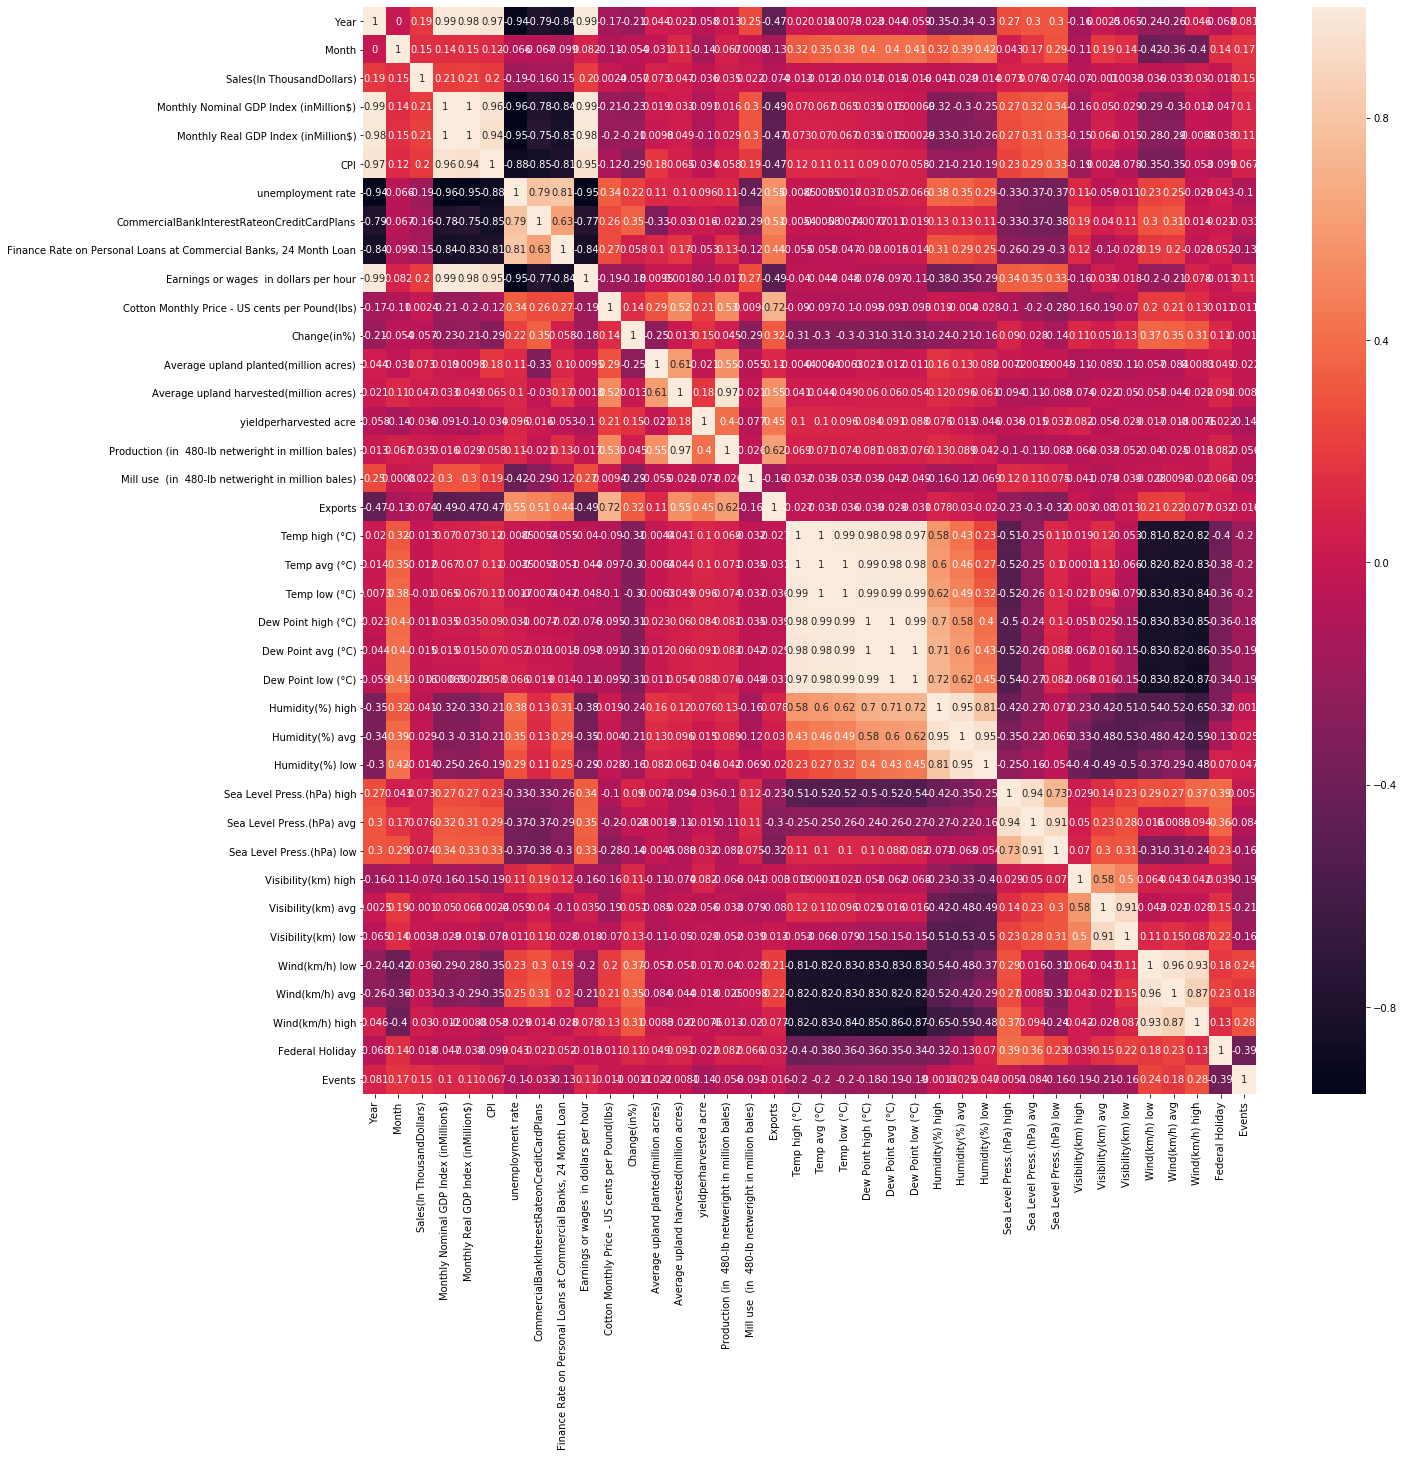

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

In [38]:
coordata=corr.loc['Sales(In ThousandDollars)']#this data is the corelation values of all the columns with the sales column.

# creating lables for catagorical columns

In [39]:
le=LabelEncoder()
total['ProductCategory']=le.fit_transform(total['ProductCategory'])

# checking the top ten features

In [40]:
df=total.dropna()

[0.00923657 0.0938871  0.         0.         0.00086753 0.01917243
 0.00565504 0.01686414 0.00496525 0.00424128 0.00919771 0.00231343
 0.00221061 0.0091973  0.00950249 0.01212692 0.01159284 0.00377003
 0.01169239 0.04265075 0.05455546 0.01212131 0.01914486 0.01860531
 0.0244178  0.01293863 0.01228791 0.02368447 0.01456244 0.029633
 0.04238513 0.01204539 0.01265204 0.01573589 0.02132056 0.01273303
 0.02638662 0.07432019 0.29132614]


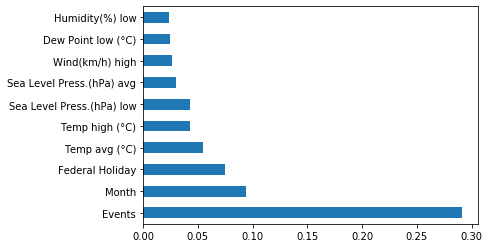

In [41]:
X = df.iloc[:,0:39] 
y = df.iloc[:,-1]   
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Building model on whole dataset with out removing any feature

In [42]:
test=total[total['Sales(In ThousandDollars)'].isnull()]
train=total[total['Sales(In ThousandDollars)'].notnull()]
test.drop(columns='Sales(In ThousandDollars)',inplace=True)
test.fillna(0,inplace=True)
train.fillna(0,inplace=True)

In [43]:
X=train.drop(columns='Sales(In ThousandDollars)')
y=train['Sales(In ThousandDollars)']

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=1)

In [45]:
from sklearn.ensemble import RandomForestRegressor
rm=RandomForestRegressor(n_estimators=25,random_state=1)
rm.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [46]:
print('train:',rm.score(xtrain,ytrain))
print('test:',rm.score(xtest,ytest))

train: 0.9930076844075835
test: 0.9489064485806156


In [47]:
ypre=rm.predict(xtest)

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
mean_squared_error1=mean_squared_error(ytest,ypre)
print('mean_squared_error:{}'.format(mean_squared_error1))

mean_squared_error:83725.05391949143


In [50]:
root_mean_squared_error=np.sqrt(mean_squared_error(ytest,ypre))
print('root_mean_squared_error:{}'.format(root_mean_squared_error))

root_mean_squared_error:289.3528190971905


In [51]:
# Now modelling for full dataset by using Test and Train.

In [52]:
model=rm.fit(X,y)
ypre=rm.predict(test)

In [53]:
print('train:',rm.score(X,y))

train: 0.993706787519021


In [54]:
# we have to use ypre and upload the values on the Hackathon Server conducted by Great Lerning.